**Name:** Sujan Dumaru  
**Course**: MSCS 634-B01: Advanced Big Data and Data Mining  
**Lab 4 Assignment**: Regression Analysis with Regularization Techniques

# Step 1: Data Preparation
Loaded the Diabetes dataset and explored feature distributions and target values.

In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd

# Load the diabetes dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name="target")

# Explore dataset
print(X.head())
print(y.head())
print(X.info())
print(X.describe())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi

In [2]:
# Check missing values
print(X.isnull().sum())
print(y.isnull().sum())

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64
0


**Note:** No any missing values found. So, no imputation/dropping required.

# Step 2: Linear Regression
Built a simple linear regression model using the BMI feature to predict disease progression. BMI was chosen as the sole feature because it is strongly correlated with disease progression based on domain knowledge or prior analysis.

Simple Linear Regression
MAE: 52.25997644534553
MSE: 4061.8259284949268
RMSE: 63.73245584860925
R²: 0.23335039815872138


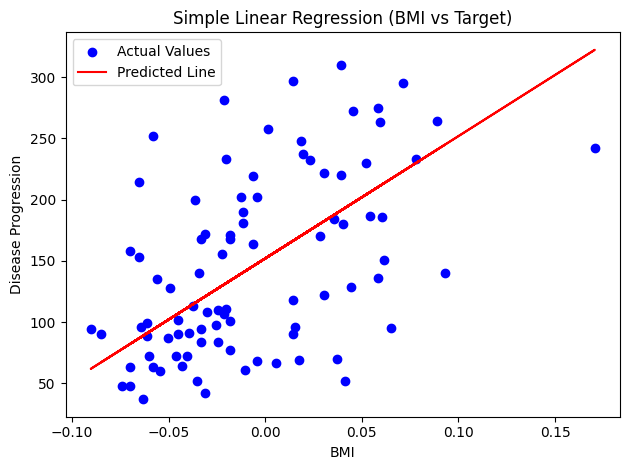

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Store all values in this variable for final comparison
results = []

# Select 'bmi' as the single feature for simple linear regression
X_bmi = X[['bmi']]
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_bmi, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
# Predict target values for the test set
y_pred = lr.predict(X_test)

# Save results and evaluate model performance
results.append({
    "Model": "Simple Linear Regression",
    "MAE": mean_absolute_error(y_test, y_pred),
    "MSE": mean_squared_error(y_test, y_pred),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
    "R²": r2_score(y_test, y_pred)
})

# Display the result
print(results[0]['Model'])
print("MAE:", results[0]['MAE'])
print("MSE:", results[0]['MSE'])
print("RMSE:", results[0]['RMSE'])
print("R²:", results[0]['R²'])

# Plot
plt.scatter(X_test, y_test, color='blue', label='Actual Values')
plt.plot(X_test, y_pred, color='red', label='Predicted Line')
plt.title("Simple Linear Regression (BMI vs Target)")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.legend()
plt.tight_layout()
plt.show()

**Insights:**
- Used only the BMI feature to predict the target.
- Captured a general positive trend but with high variance.
- *R² = 0.2333* which indicates low explanatory power.
- High MAE and RMSE suggest poor accuracy.
- Model is likely underfitting due to limited input and linear assumption.

# Step 3: Multiple Regression
Trained a multiple linear regression model using all features to evaluate improvement over the simple model.

Multiple Linear Regression
MAE: 42.79409467959994
MSE: 2900.1936284934814
RMSE: 53.85344583676593
R²: 0.4526027629719195


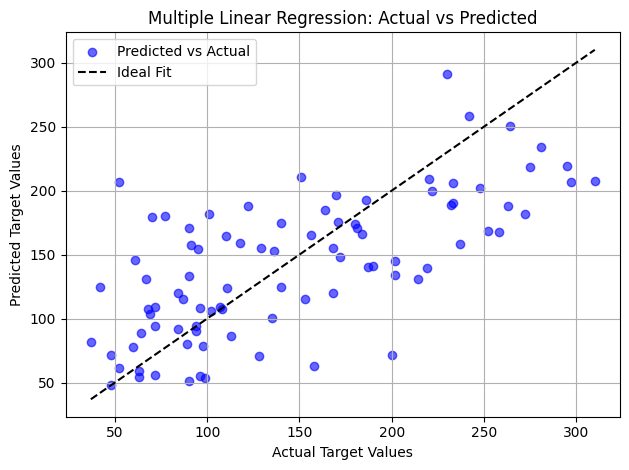

In [4]:
# Use all features for multiple regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the multiple linear regression model
lr_multi = LinearRegression()
lr_multi.fit(X_train, y_train)
# Predict target values for test data
y_pred_multi = lr_multi.predict(X_test)

# Save results and evaluate model performance
results.append({
    "Model": "Multiple Linear Regression",
    "MAE": mean_absolute_error(y_test, y_pred_multi),
    "MSE": mean_squared_error(y_test, y_pred_multi),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_multi)),
    "R²": r2_score(y_test, y_pred_multi)
})

# Display the result
print(results[1]['Model'])
print("MAE:", results[1]['MAE'])
print("MSE:", results[1]['MSE'])
print("RMSE:", results[1]['RMSE'])
print("R²:", results[1]['R²'])

# Plot
plt.scatter(y_test, y_pred_multi, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--', label='Ideal Fit')
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.title("Multiple Linear Regression: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Insights:**
- Used all features for prediction and showed clear improvement over the simple linear model.
- R² score improved to 0.4526, showing stronger explanatory power.
- Lower MAE and RMSE indicate better fit and reduced prediction error.
- Demonstrates that multiple features carry useful predictive signals for disease progression.
- Despite the linear assumption, the model performs well, making it a strong baseline for comparison.

# Step 4: Polynomial Regression
Extended the linear model with degree-2 polynomial features to capture non-linear relationships

Polynomial Regression
MAE: 43.58169325465259
MSE: 3096.02830734429
RMSE: 55.64196534401252
R²: 0.41563993364079665


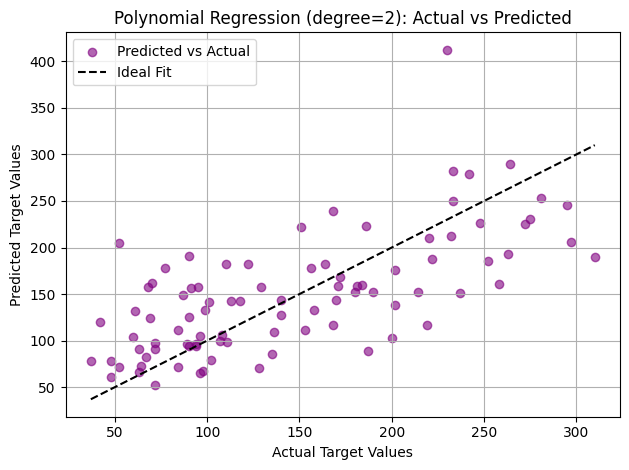

In [5]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features of degree 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
# Split transformed data
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train a linear regression model on polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)
# Predict on test set
y_pred_poly = lr_poly.predict(X_test_poly)

# Save results and evaluate model performance
results.append({
    "Model": "Polynomial Regression",
    "MAE": mean_absolute_error(y_test, y_pred_poly),
    "MSE": mean_squared_error(y_test, y_pred_poly),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_poly)),
    "R²": r2_score(y_test, y_pred_poly)
})

# Display the result
print(results[2]['Model'])
print("MAE:", results[2]['MAE'])
print("MSE:", results[2]['MSE'])
print("RMSE:", results[2]['RMSE'])
print("R²:", results[2]['R²'])

# Plot
plt.scatter(y_test, y_pred_poly, color='purple', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--', label='Ideal Fit')
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.title("Polynomial Regression (degree=2): Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Insights:**
- Included polynomial and interaction terms to capture non-linear relationships in the data.
- Achieved moderate performance with *R² = 0.416*, better than Simple Linear Regression.
- MAE and RMSE were reduced compared to the simple model, confirming a better fit to complex patterns.
- Visualization showed closer alignment between predicted and actual values, especially for mid-range predictions.
- Caution: increasing polynomial degree further may lead to overfitting and poor generalization.

# Step 5: Regularization with Ridge and Lasso Regression
Applied Ridge and Lasso regression to test how regularization impacts overfitting and model performance.

Ridge Regression
MAE: 46.138857666974516
MSE: 3077.41593882723
RMSE: 55.47446204180109
R²: 0.41915292635986545

Lasso Regression
MAE: 42.85442771664998
MSE: 2798.1934851697188
RMSE: 52.897953506442185
R²: 0.4718547867276227



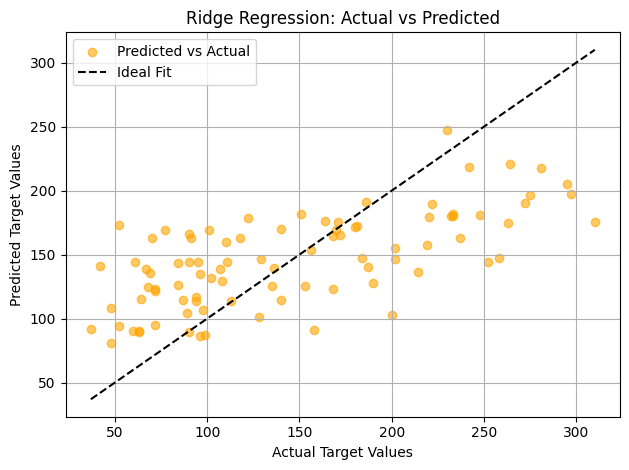

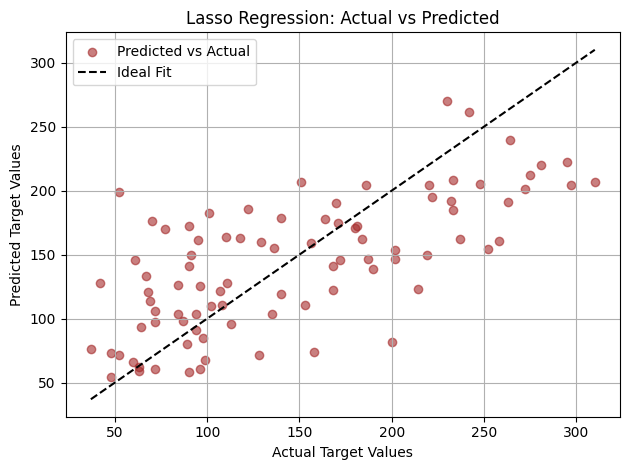

In [6]:
from sklearn.linear_model import Ridge, Lasso

# Train Ridge Regression with alpha = 1.0
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Train Lasso Regression with alpha = 0.1
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Evaluating, saving and printing the result
def evaluate(model_name, y_true, y_pred, index):
    results.append({
        "Model": model_name,
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R²": r2_score(y_test, y_pred)
    })

    print(results[index]['Model'])
    print("MAE:", results[index]['MAE'])
    print("MSE:", results[index]['MSE'])
    print("RMSE:", results[index]['RMSE'])
    print("R²:", results[index]['R²'])
    print()

evaluate("Ridge Regression", y_test, y_pred_ridge, 3)
evaluate("Lasso Regression", y_test, y_pred_lasso, 4)

# Ridge Regression plot
plt.scatter(y_test, y_pred_ridge, color='orange', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--', label='Ideal Fit')
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.title("Ridge Regression: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Lasso Regression plot
plt.scatter(y_test, y_pred_lasso, color='brown', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--', label='Ideal Fit')
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.title("Lasso Regression: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Ridge Regression – Insights:**
- Introduced L2 regularization to reduce overfitting and stabilize coefficients.
- Achieved slightly better performance than Polynomial Regression, with *R² = 0.419*.
- Predictions were less variable but still captured key trends.
- Demonstrated improved generalization over unregularized models without major gains.
- Well-suited for handling multicollinearity, though Lasso performed better in this dataset.

**Lasso Regression – Insights**
- Applied L1 regularization, shrinking irrelevant feature coefficients to zero.
- The best-performing model overall, with highest *R² (0.472)* and lowest *RMSE (52.90)*.
- Helped enhance model simplicity through automatic feature selection.
- Outperformed Polynomial and Ridge by avoiding overfitting and noise amplification.
- Particularly effective for datasets where some features are more influential than others.

## Demonstration of how alpha values affect the model's behavior and result
Visualization of **R²** vs **Alpha** plot for both Ridge and Lasso Regression to show how the model performance varies as regularization strength increases

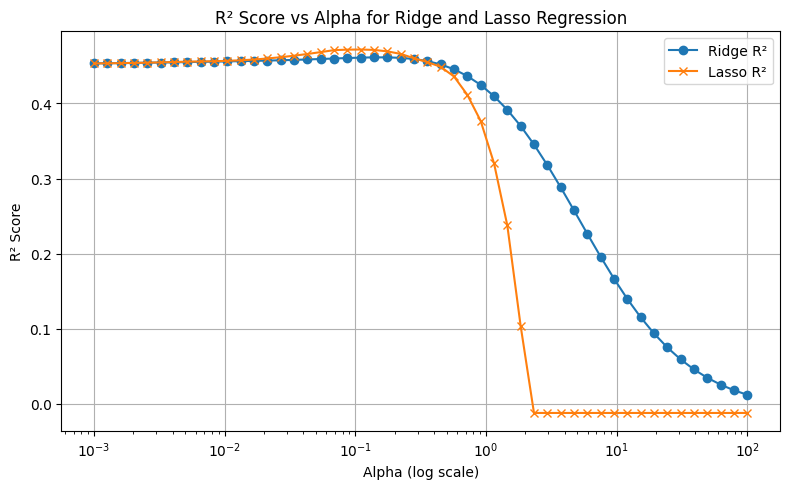

In [7]:
# Define alpha range
alphas = np.logspace(-3, 2, 50)

# Store R² values
ridge_r2 = []
lasso_r2 = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)
    ridge_r2.append(r2_score(y_test, y_pred_ridge))
    
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)
    lasso_r2.append(r2_score(y_test, y_pred_lasso))

# Plot
plt.figure(figsize=(8, 5))
plt.plot(alphas, ridge_r2, label='Ridge R²', marker='o')
plt.plot(alphas, lasso_r2, label='Lasso R²', marker='x')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('R² Score')
plt.title('R² Score vs Alpha for Ridge and Lasso Regression')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Insights:**
- Ridge Regression maintains relatively stable performance across a wide range of α values, with a mild decline as α increases.
- Lasso Regression shows sharper performance drops at higher α values due to aggressive coefficient shrinking.
- Very small or very large α values may lead to underfitting, while moderate values help balance bias and variance.

# Step 6: Model Comparison and Analysis
Summarized and compared the performance of all regression models using evaluation metrics and plots.

In [8]:
summary_df = pd.DataFrame(results)
summary_df

,Model,MAE,MSE,RMSE,R²
0,Simple Linear Regression,52.259976,4061.825928,63.732456,0.233350
1,Multiple Linear Regression,42.794095,2900.193628,53.853446,0.452603
2,Polynomial Regression,43.581693,3096.028307,55.641965,0.415640
3,Ridge Regression,46.138858,3077.415939,55.474462,0.419153
4,Lasso Regression,42.854428,2798.193485,52.897954,0.471855


This lab explored five regression techniques—Simple Linear Regression, Multiple Linear Regression, Polynomial Regression, Ridge Regression, and Lasso Regression using the Diabetes dataset. Each model varied in complexity and regularization strength, offering a range of predictive performance and interpretability.

## Model Performance Summary

**Simple Linear Regression (BMI only):** Performed modestly, with an R² of 0.233. While it captured a general trend, the model had high error and limited predictive power due to using only one feature.  
**Multiple Linear Regression:** Showed a substantial improvement with R² = 0.453, MAE = 42.79, and RMSE = 53.85. This model benefited from incorporating all features, making it a strong linear baseline with no regularization.  
**Polynomial Regression (Degree = 2):** Captured non-linear patterns and improved over the simple model (R² = 0.416), but it was outperformed by both Multiple Linear and Lasso Regression. It remains a useful approach but may risk overfitting if extended further.  
**Ridge Regression:** Introduced L2 regularization and achieved R² = 0.419, slightly better than Polynomial Regression. It helped reduce overfitting but did not outperform unregularized multiple linear regression.  
**Lasso Regression:** Emerged as the best-performing model, with R² = 0.472 and RMSE = 52.90. Lasso’s feature selection via L1 regularization improved both performance and interpretability.

## Key Observations

- Lasso Regression provided the best overall fit, suggesting that sparsity and feature selection are beneficial for this dataset.
- Multiple Linear Regression performed nearly as well as Lasso without regularization, highlighting the relevance of most features.
- Polynomial Regression was useful but less effective than expected, showing that non-linearity alone does not guarantee better results.
- Ridge Regression was stable and interpretable but offered limited performance gains.
- Visualizations confirmed that Lasso and Multiple Linear Regression predictions aligned most closely with actual values.

## Insights on the Diabetes Dataset

- The dataset contains meaningful linear relationships between features and the target (disease progression).
- While BMI alone is a strong predictor, combining all features yields significantly better results.
- The presence of correlated features suggests that feature selection (as done by Lasso) can enhance model performance.
- Future improvement could come from feature transformation, interaction terms, or non-linear kernels beyond degree-2 polynomials.